In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
import corner
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
from ligtools import dilser

In [3]:
ligs = dilser()

In [4]:
ligs

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [7]:
def klotz1(k,free_ligand):
    bound_fraction = (k*free_ligand)/(1 + k*free_ligand)
    return bound_fraction

In [9]:
dat1 = klotz1(1.0,ligs)

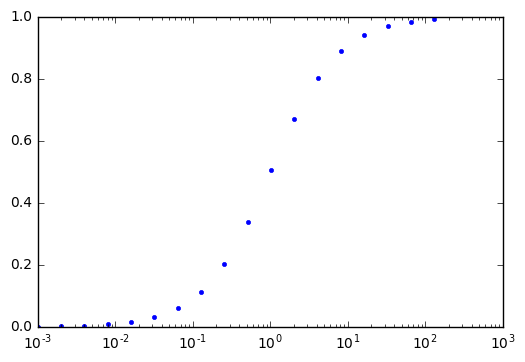

In [10]:
plt.semilogx(ligs,dat1,'.')

In [11]:
def klotz1_obj(k,lig,dat,eps=None):
    bfrac = (k*lig)/(1 + k*lig)
    if eps is None:
        return (bfrac - dat)
    else:
        return (bfrac - dat)/eps

In [15]:
klotz1_obj(1.,ligs,dat1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [18]:
np.random.normal(1,.05, len(ligs))

array([ 0.92033083,  0.92344164,  1.02907876,  0.97509946,  1.02711051,
        0.98412046,  0.97211735,  1.03091134,  0.94729827,  1.01373997,
        1.03904073,  1.00205051,  1.1013236 ,  1.02542915,  0.99911867,
        0.93178438,  0.97338045,  1.05888107])

In [20]:
import ligtools

In [21]:
%autoreload

In [23]:
dat1n = ligtools.noiser(dat1,0.05)

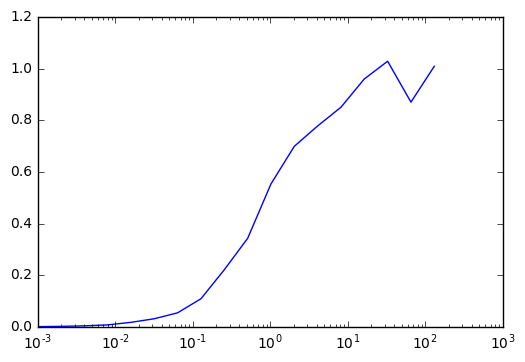

In [24]:
plt.semilogx(ligs,dat1n)

In [29]:
set1 = np.array([ligtools.noiser(dat1,0.05) for i in range(5)])

In [31]:
klotz1_obj(1.,ligs,set1)

array([[  7.34627372e-05,   2.34110563e-05,   1.96480932e-04,
         -2.72048184e-04,   1.44262539e-03,  -9.15800659e-04,
         -3.32538314e-03,   1.93170547e-03,   1.45786670e-02,
         -1.29630238e-03,  -2.04772716e-02,  -4.12080606e-03,
          4.07491914e-02,  -5.16025896e-02,   1.72413911e-02,
         -3.24789859e-02,  -2.95496644e-03,  -1.81561805e-02],
       [ -1.05102565e-05,   1.08224168e-05,   1.81737736e-05,
         -1.01912932e-04,   5.34906072e-04,  -9.81437603e-04,
         -1.47806780e-03,  -7.44708729e-03,  -1.23746068e-02,
          1.01613196e-02,   1.63590734e-02,   1.12640648e-02,
         -2.60166208e-02,  -3.73069785e-02,   3.90122096e-02,
          3.36436590e-02,   3.73633555e-02,   9.47468207e-02],
       [  3.44806774e-05,  -2.91795399e-05,  -1.28758425e-04,
          4.01823249e-05,  -7.49815688e-04,  -1.27244675e-03,
         -2.81886644e-03,   1.13800526e-02,  -7.23712808e-03,
          2.34726040e-02,  -1.81573307e-02,   2.00114993e-02,
      

In [32]:
setcon = np.concatenate(set1)

In [33]:
klotz1_obj(1.,ligs,setcon)

ValueError: operands could not be broadcast together with shapes (18,) (90,) 

ValueError: x and y must have same first dimension

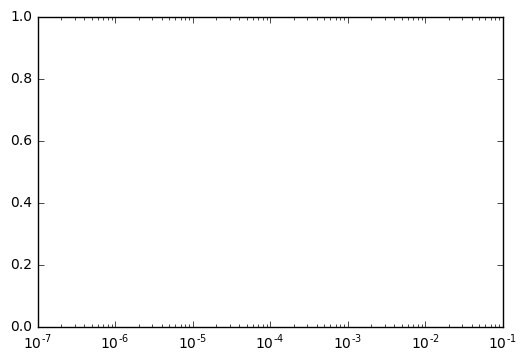

In [34]:
plt.semilogx(ligs,set1,'.')

In [36]:
ligset = np.array([ligs for i in range(5)])

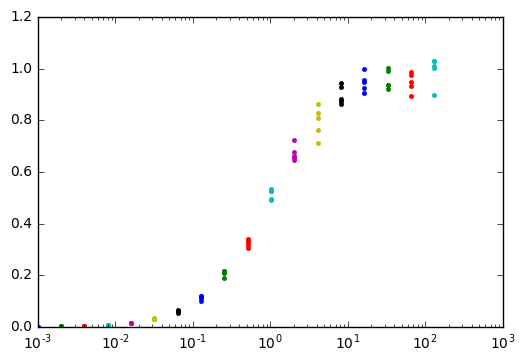

In [39]:
plt.semilogx(ligset,set1,'.')

In [40]:
klotz1_obj(0.8,ligset,set1)

array([[ -1.26177750e-04,  -3.75152838e-04,  -5.97790150e-04,
         -1.84925564e-03,  -1.66717546e-03,  -6.96255416e-03,
         -1.47695186e-02,  -1.86552280e-02,  -1.92562692e-02,
         -4.93417534e-02,  -7.60982977e-02,  -5.50544030e-02,
          3.16185225e-03,  -7.51995433e-02,   3.87976244e-03,
         -3.96104028e-02,  -6.64200617e-03,  -2.00312057e-02],
       [ -2.10150744e-04,  -3.87741478e-04,  -7.76097308e-04,
         -1.67912039e-03,  -2.57489478e-03,  -7.02819110e-03,
         -1.29222033e-02,  -2.80340208e-02,  -4.62095430e-02,
         -3.78841314e-02,  -3.92619527e-02,  -3.96695321e-02,
         -6.36039600e-02,  -6.09039323e-02,   2.56505809e-02,
          2.65122420e-02,   3.36763158e-02,   9.28717954e-02],
       [ -1.65159810e-04,  -4.27743434e-04,  -9.23029506e-04,
         -1.53702513e-03,  -3.85961654e-03,  -7.31920025e-03,
         -1.42630019e-02,  -9.20688084e-03,  -4.10720643e-02,
         -2.45728470e-02,  -7.37783568e-02,  -3.09220976e-02,
      

In [42]:
parm = np.array([0.6])

In [43]:
bound1 = ((0.),(10.))

In [44]:
optimize.least_squares(klotz1_obj,parm,bounds=bound1,args=(ligset,set1))

ValueError: `fun` must return at most 1-d array_like.

In [45]:
%autoreload

In [48]:
res = optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligset,set1))

In [49]:
res.x

array([ 0.99307842])

In [53]:
meanset = set1.mean(axis=0)

In [54]:
res = optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,meanset))

ValueError: zero-dimensional arrays cannot be concatenated

In [57]:
ligset.ndim

2

In [58]:
ligs.ndim

1

In [59]:
%autoreload

In [60]:
res1 = optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,meanset))

In [61]:
res1.x

array([ 0.99307842])

In [62]:
res.x

array([ 0.99307842])

In [63]:
res1.fun

array([  3.73057266e-05,  -4.27586061e-05,  -2.28227192e-05,
        -1.44319741e-04,   2.85662246e-04,  -8.86673539e-04,
        -8.25120744e-04,  -7.52947105e-04,  -5.50865887e-03,
         1.23494418e-02,  -1.01145793e-02,  -1.15614269e-03,
         6.98419315e-03,  -7.65086392e-03,  -4.26446774e-03,
         1.30527541e-02,   3.79109168e-02,  -1.40657584e-03])

In [65]:
klotz1(res1.x,ligs)

array([  9.92093194e-04,   1.98221984e-03,   3.95659684e-03,
         7.88200775e-03,   1.56407351e-02,   3.07997396e-02,
         5.97589201e-02,   1.12778329e-01,   2.02696846e-01,
         3.37070554e-01,   5.04192622e-01,   6.70383054e-01,
         8.02669846e-01,   8.90534501e-01,   9.42098121e-01,
         9.70185915e-01,   9.84867375e-01,   9.92376002e-01])

In [66]:
res1.fun + klotz1(res1.x,ligs)

array([ 0.0010294 ,  0.00193946,  0.00393377,  0.00773769,  0.0159264 ,
        0.02991307,  0.0589338 ,  0.11202538,  0.19718819,  0.34942   ,
        0.49407804,  0.66922691,  0.80965404,  0.88288364,  0.93783365,
        0.98323867,  1.02277829,  0.99096943])

In [67]:
klotz1(1.,ligs)

array([ 0.000999  ,  0.00199601,  0.00398406,  0.00793651,  0.01574803,
        0.03100775,  0.06015038,  0.11347518,  0.20382166,  0.33862434,
        0.50592885,  0.67191601,  0.80376766,  0.89120975,  0.94247584,
        0.97038616,  0.98497054,  0.99242837])

In [69]:
klotz1(res1.x,ligs) - meanset

array([  3.73057266e-05,  -4.27586061e-05,  -2.28227192e-05,
        -1.44319741e-04,   2.85662246e-04,  -8.86673539e-04,
        -8.25120744e-04,  -7.52947105e-04,  -5.50865887e-03,
         1.23494418e-02,  -1.01145793e-02,  -1.15614269e-03,
         6.98419315e-03,  -7.65086392e-03,  -4.26446774e-03,
         1.30527541e-02,   3.79109168e-02,  -1.40657584e-03])

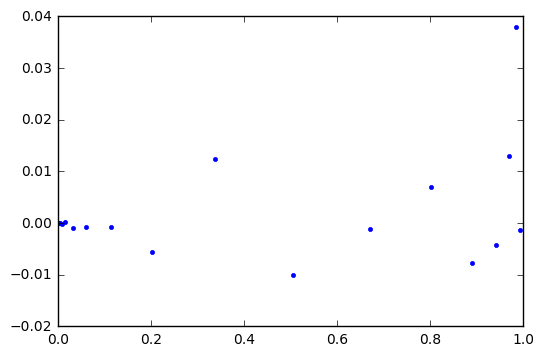

In [71]:
plt.plot(klotz1(res1.x,ligs),res1.fun,'.')

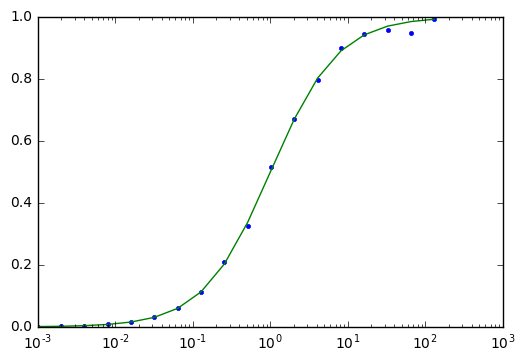

In [73]:
plt.semilogx(ligs,meanset,'.')
plt.semilogx(ligs,klotz1(res1.x,ligs),'-')

In [74]:
errs = meanset*0.05

In [75]:
errs

array([  4.77393734e-05,   1.01248922e-04,   1.98970978e-04,
         4.01316374e-04,   7.67753643e-04,   1.58432066e-03,
         3.02920204e-03,   5.67656381e-03,   1.04102753e-02,
         1.62360556e-02,   2.57153601e-02,   3.35769598e-02,
         3.97842826e-02,   4.49092682e-02,   4.73181295e-02,
         4.78566580e-02,   4.73478229e-02,   4.96891289e-02])

In [78]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
    Plot an errorbar graph.
    
    Call signature::
    
      errorbar(x, y, yerr=None, xerr=None,
               fmt='', ecolor=None, elinewidth=None, capsize=None,
               barsabove=False, lolims=False, uplims=False,
               xlolims=False, xuplims=False, errorevery=1,
               capthick=None)
    
    Plot *x* versus *y* with error deltas in *yerr* and *xerr*.
    Vertical errorbars are plotted if *yerr* is not *None*.
    Horizontal errorbars are plotted if *xerr* is not *None*.
    
    *x*, *y*, *xerr*, and *yerr* can all be scalars, which plots a
    single error bar at *x*, *y*.
    
    Optional keyword arguments:
    
      *xerr*/*yerr*: [ scalar | N, Nx1, or 2xN array-like ]
  

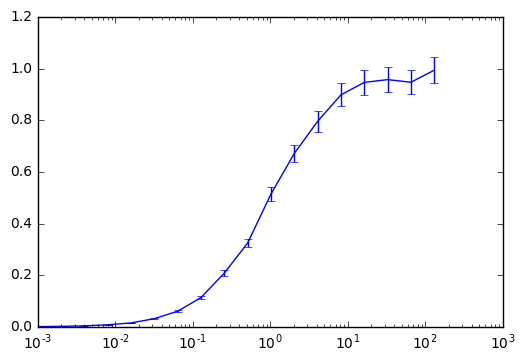

In [81]:
plt.errorbar(ligs,meanset,errs)
plt.xscale('log')

In [91]:
ligtools.klotz1_obj(0.6, ligs, meanset,errs)

array([-0.00035515, -0.00082642, -0.00158517, -0.00324926, -0.00584636,
       -0.01284811, -0.02360407, -0.04220884, -0.0750571 , -0.08971499,
       -0.13373237, -0.12021113, -0.08490361, -0.06724136, -0.03869528,
       -0.005534  ,  0.02824294, -0.00633858])

In [92]:
errs

array([  4.77393734e-05,   1.01248922e-04,   1.98970978e-04,
         4.01316374e-04,   7.67753643e-04,   1.58432066e-03,
         3.02920204e-03,   5.67656381e-03,   1.04102753e-02,
         1.62360556e-02,   2.57153601e-02,   3.35769598e-02,
         3.97842826e-02,   4.49092682e-02,   4.73181295e-02,
         4.78566580e-02,   4.73478229e-02,   4.96891289e-02])

In [93]:
%autoreload

In [94]:
ligtools.klotz1_obj(0.6, ligs, meanset,errs)

array([-7.43929437, -8.16222733, -7.96681899, -8.0964985 , -7.61488608,
       -8.10953802, -7.79217474, -7.43563196, -7.20990544, -5.52566428,
       -5.20048619, -3.58016713, -2.13409924, -1.49727125, -0.81776864,
       -0.11563693,  0.59649921, -0.12756467])

In [95]:
res_wt = optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,meanset,errs))

In [96]:
res_wt.x

array([ 0.99666271])

In [98]:
%autoreload

In [99]:
ligtools.klotz1(1.,ligs)

array([ 0.000999  ,  0.00199601,  0.00398406,  0.00793651,  0.01574803,
        0.03100775,  0.06015038,  0.11347518,  0.20382166,  0.33862434,
        0.50592885,  0.67191601,  0.80376766,  0.89120975,  0.94247584,
        0.97038616,  0.98497054,  0.99242837])

In [142]:
results_weighted = []
for i in range(10000):
    dat = ligtools.noiser(ligtools.klotz1(1.,ligs),0.05)
    err = 0.05*dat
    results_weighted.append(optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,dat,err)))   

In [111]:
results_wgt = np.array(results_weighted)

In [114]:
results_wgt.mean()

0.99476820167502245

In [106]:
ligtools.noiser(ligtools.klotz1(1.,ligs),0.05)

array([  1.01170839e-03,   2.06370298e-03,   3.95696192e-03,
         7.83688926e-03,   1.55933006e-02,   3.20869046e-02,
         6.13034794e-02,   1.17105384e-01,   1.98800356e-01,
         3.29147245e-01,   4.89332792e-01,   6.82349046e-01,
         8.12467279e-01,   9.45540909e-01,   9.74567381e-01,
         1.00672943e+00,   9.51050958e-01,   1.01392983e+00])

In [143]:
results_unweighted = []
for i in range(10000):
    dat = ligtools.noiser(ligtools.klotz1(1.,ligs),0.05)
    results_unweighted.append(optimize.least_squares(ligtools.klotz1_obj,parm,bounds=bound1,args=(ligs,dat)))

In [116]:
results_un = np.array(results_unweighted)

In [117]:
results_un.mean()

1.0005306570943613

In [129]:
results = np.vstack([results_wgt,results_un])

{'boxes': [<matplotlib.lines.Line2D at 0x11042c828>],
 'caps': [<matplotlib.lines.Line2D at 0x111c12f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x111c0a6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111c0f2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111c17978>,
  <matplotlib.lines.Line2D at 0x111c170b8>]}

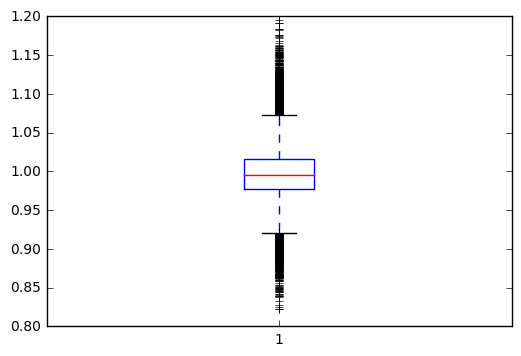

In [132]:
plt.boxplot(results)

In [139]:
results = np.stack([np.concatenate(results_unweighted),np.concatenate(results_weighted)],axis=1)

In [140]:
results

array([[ 0.96146006,  0.98662571],
       [ 1.01799805,  0.97325732],
       [ 1.08571076,  0.97717147],
       ..., 
       [ 1.04975791,  0.99152541],
       [ 0.99523633,  1.00130028],
       [ 1.0485709 ,  1.00423812]])

{'boxes': [<matplotlib.lines.Line2D at 0x11de406d8>,
 'caps': [<matplotlib.lines.Line2D at 0x11de47cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11de56ef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11de4eef0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11de40978>,
  <matplotlib.lines.Line2D at 0x11de64b70>]}

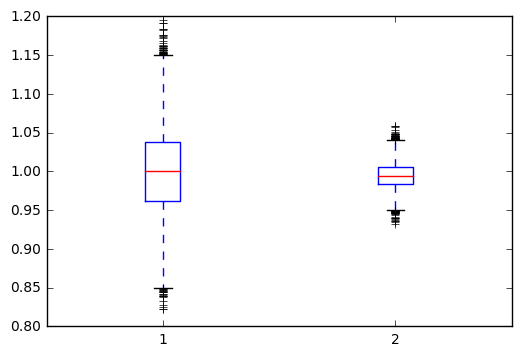

In [141]:
plt.boxplot(results)

In [144]:
parms_weighted = [i.x for i in results_weighted]

In [145]:
parms_weighted[1]

array([ 0.99932779])

In [146]:
resids_weighted = [i.fun for i in results_weighted]

In [147]:
resids_weighted[1]

array([-0.63602802, -1.47282979,  0.09140047, -1.21769494,  0.89516019,
        0.26002951,  0.13429922,  0.37644142,  2.11472105, -0.56224935,
        0.12052337, -0.9354021 ,  0.26066854,  0.04646241,  0.62972095,
        0.27731325, -0.32864641,  1.4154074 ])

In [148]:
parms_unweighted = [i.x for i in results_unweighted]

In [149]:
resids_unweighted = [i.fun for i in results_unweighted]

In [150]:
resids_unweighted[1]

array([  8.17993700e-05,   3.52275913e-04,   2.41470086e-04,
         9.62432708e-04,   1.34169981e-03,   2.22147766e-03,
         2.24541902e-03,   9.37033252e-03,   3.63590043e-02,
         1.90457288e-02,   1.68115308e-02,  -3.93532415e-02,
        -4.61066704e-02,  -1.22929776e-02,  -3.93019640e-03,
         2.20260907e-02,   1.31741640e-02,  -7.71055553e-02])

In [151]:
parmcomp = np.stack([np.concatenate(parms_weighted),np.concatenate(parms_unweighted)],axis=1)

In [152]:
parmcomp

array([[ 1.00584002,  1.0741017 ],
       [ 0.99932779,  1.11882479],
       [ 1.01354528,  0.93848481],
       ..., 
       [ 1.01227053,  0.99999808],
       [ 0.99399597,  1.03199452],
       [ 0.97917427,  1.0006268 ]])

{'boxes': [<matplotlib.lines.Line2D at 0x11df1aeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x11df28c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11df37860>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11df30780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11df219b0>,
  <matplotlib.lines.Line2D at 0x11dee61d0>]}

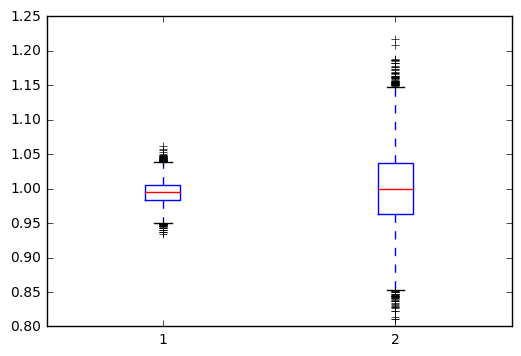

In [153]:
plt.boxplot(parmcomp)

In [155]:
from scipy import stats

In [160]:
stats.normaltest(parmcomp[:,1])

NormaltestResult(statistic=5.5060083551460446, pvalue=0.063736098748240294)

In [161]:
stats.normaltest(parmcomp[:,0])

NormaltestResult(statistic=0.77348870917144619, pvalue=0.67926472364367818)

In [163]:
parmcomp[:,1].mean()

1.000415260794475

In [164]:
parmcomp[:,0].mean()

0.99462574340151044

In [166]:
 np.median(parmcomp[:,1])

0.99944050202464318

In [167]:
np.median(parmcomp[:,0])

0.9945540496756522

In [170]:
dat = np.array([ligtools.noiser(ligtools.klotz1(1.,ligs),0.05) for i in range(3)])

In [174]:
dat.shape

(3, 18)

In [179]:
dat.mean(axis=0)

array([  1.00447978e-03,   1.92581487e-03,   3.89471054e-03,
         7.76713338e-03,   1.63737930e-02,   3.35491160e-02,
         5.82952432e-02,   1.12759780e-01,   2.11260669e-01,
         3.45892728e-01,   5.07884823e-01,   7.13791166e-01,
         7.88698897e-01,   9.53906447e-01,   9.10064067e-01,
         9.96188422e-01,   9.75943131e-01,   1.02429209e+00])

In [180]:
dat.std(axis=0)

array([  1.26407997e-05,   8.96869288e-05,   1.85809834e-04,
         5.09418248e-04,   2.90896522e-04,   1.05214056e-03,
         1.27423392e-03,   2.62922056e-03,   4.63289423e-03,
         1.17425757e-02,   1.29886380e-02,   3.79537714e-02,
         1.87996284e-02,   6.77601955e-02,   4.39054315e-02,
         2.46208329e-02,   1.60465753e-02,   1.96835456e-02])

In [181]:
dat.mean(axis=0)/dat.std(axis=0)

array([ 79.46330967,  21.47263703,  20.96073416,  15.24706549,
        56.28734548,  31.88653442,  45.74924765,  42.88715153,
        45.60014939,  29.45629106,  39.10223862,  18.80685736,
        41.95289814,  14.07768144,  20.72782426,  40.46119912,
        60.81940307,  52.03798685])

In [183]:
pstd = dat.std(axis=0)/dat.mean(axis=0)

In [185]:
pstd.mean()

0.033603654121047564

In [207]:
holder = []
for i in range(10000):
    dat = np.array([ligtools.noiser(ligtools.klotz1(1.,ligs),0.05) for i in range(3)])
    holder.append((dat.std(axis=0)/dat.mean(axis=0)).mean())

In [208]:
 dat = np.array([ligtools.noiser(ligtools.klotz1(1.,ligs),0.05) for i in range(3)])

In [209]:
dat

array([[  1.09690830e-03,   2.03709120e-03,   3.93946541e-03,
          8.00139172e-03,   1.60136546e-02,   2.81223413e-02,
          5.78201901e-02,   1.18589396e-01,   2.06021450e-01,
          3.57932061e-01,   5.16856326e-01,   6.73827422e-01,
          8.12924277e-01,   9.04509788e-01,   9.58935385e-01,
          8.69492664e-01,   9.87541621e-01,   9.22153239e-01],
       [  1.03192019e-03,   2.10412581e-03,   3.87815727e-03,
          7.95267768e-03,   1.55033155e-02,   3.21356182e-02,
          6.38238093e-02,   1.08512970e-01,   2.08233899e-01,
          3.38555065e-01,   5.40566366e-01,   6.92941347e-01,
          7.82762448e-01,   8.21821471e-01,   1.02158693e+00,
          1.06183125e+00,   9.96443373e-01,   1.01761390e+00],
       [  9.89593876e-04,   2.00897812e-03,   3.83949776e-03,
          7.77646140e-03,   1.62621076e-02,   3.00602032e-02,
          6.26775979e-02,   1.18610803e-01,   2.02203000e-01,
          3.47336441e-01,   5.48615188e-01,   7.05518497e-01,
      

In [239]:
holder = []
for i in range(10000):
    dat = np.array([ligtools.noiser(ligtools.klotz1(1.,ligs),0.05) for i in range(100)])
    holder.append((dat.std(axis=0)/dat.mean(axis=0)).mean())

In [240]:
thing = np.array(holder)

(array([   1.,    0.,    1.,    0.,    2.,    0.,    1.,    2.,    1.,
           1.,    4.,    2.,    3.,   10.,    9.,    6.,   10.,   12.,
          16.,   22.,   24.,   19.,   38.,   31.,   40.,   47.,   64.,
          68.,   81.,   79.,  111.,  108.,  137.,  148.,  176.,  161.,
         203.,  187.,  214.,  247.,  272.,  252.,  290.,  311.,  296.,
         312.,  321.,  343.,  336.,  332.,  332.,  313.,  328.,  289.,
         291.,  253.,  285.,  255.,  232.,  220.,  200.,  178.,  190.,
         158.,  165.,  133.,  119.,   93.,  114.,   75.,   69.,   58.,
          55.,   34.,   40.,   26.,   24.,   22.,   28.,   12.,   12.,
          10.,    5.,    5.,    2.,    5.,    5.,    5.,    2.,    2.,
           3.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.04634216,  0.04640935,  0.04647655,  0.04654374,  0.04661093,
         0.04667813,  0.04674532,  0.04681251,  0.04687971,  0.0469469 ,
         0.04701409,  0.04708129,  0.04714848,  0.04721567,  0.0

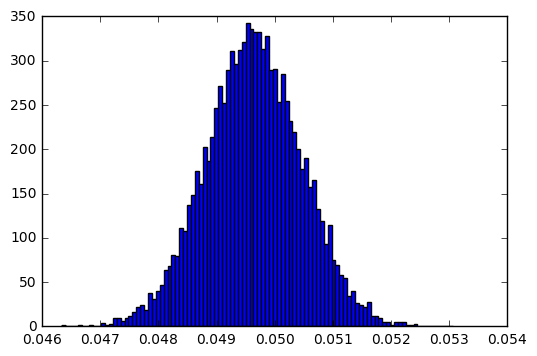

In [245]:
plt.hist(thing,bins=100)

In [242]:
thing.mean()

0.049634401167824166

In [243]:
thing.std()

0.00082525527285308973

In [244]:
np.median(thing)

0.049631490820246697